# Gradient Descent

It is an optimization technique to find the minimum value of a function.

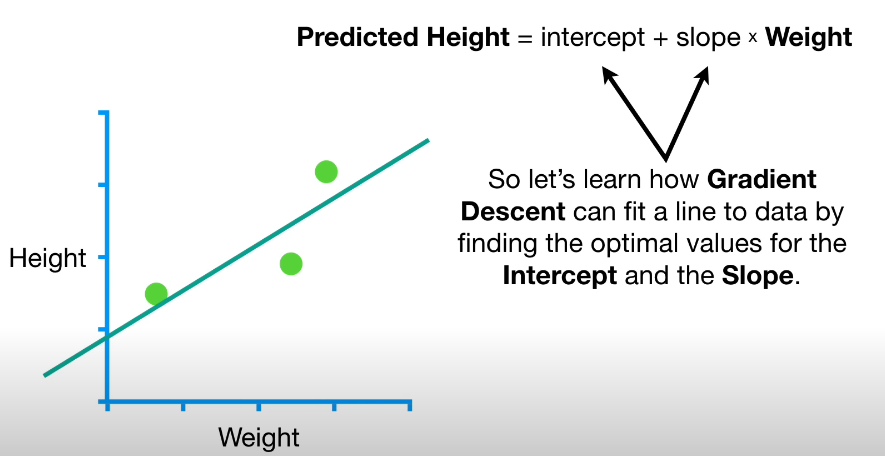
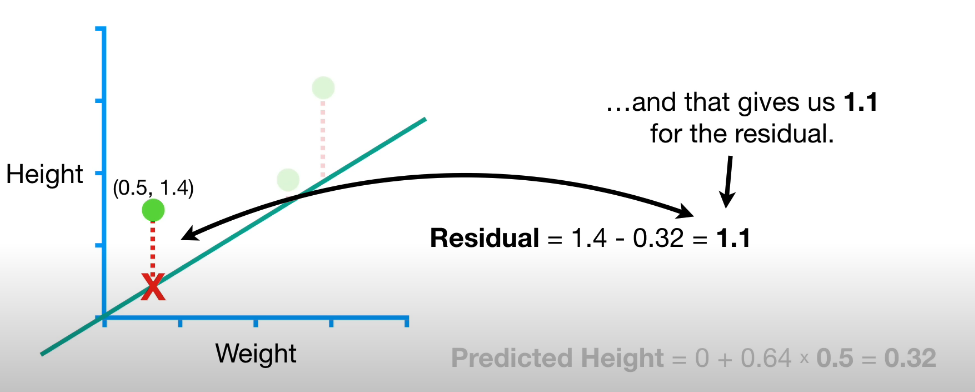
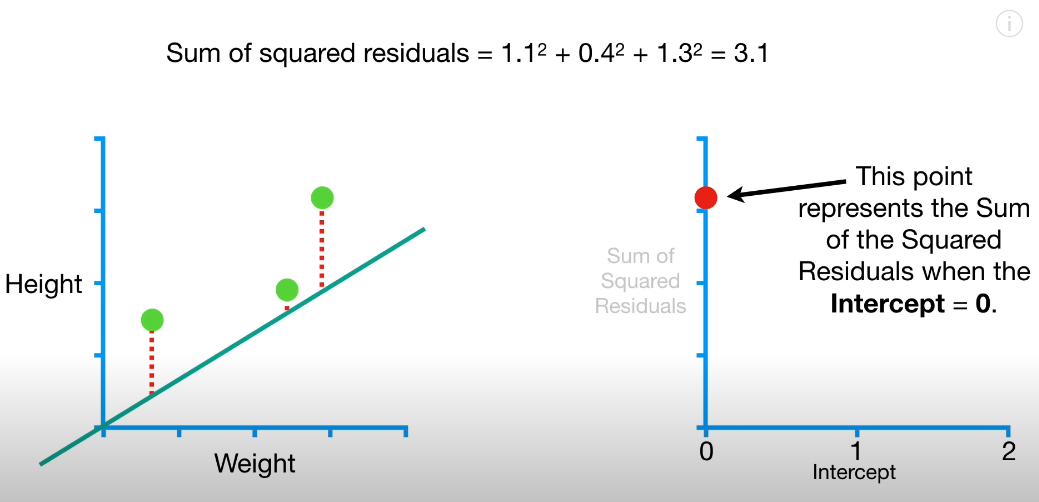
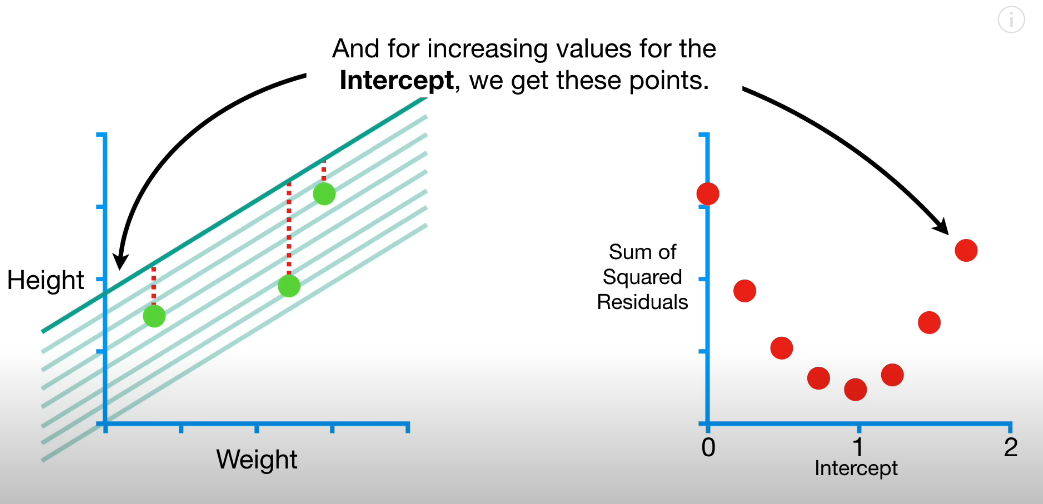
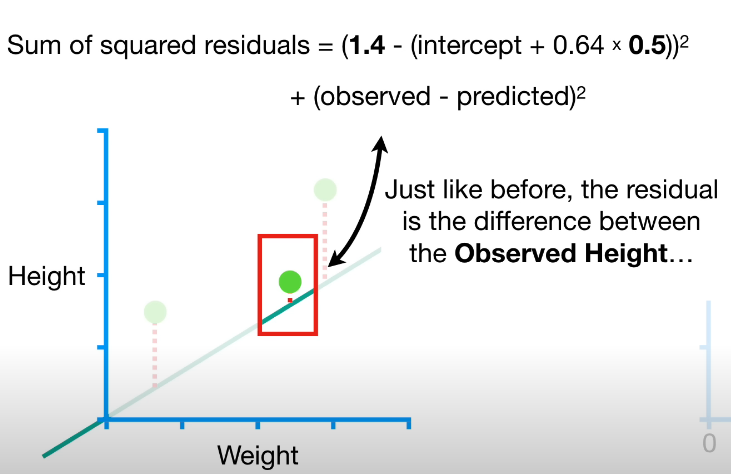
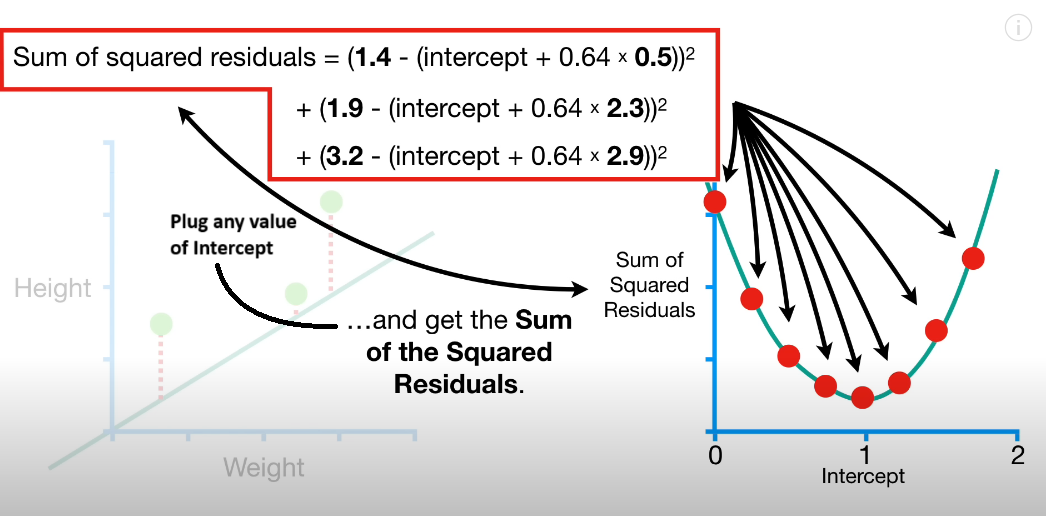
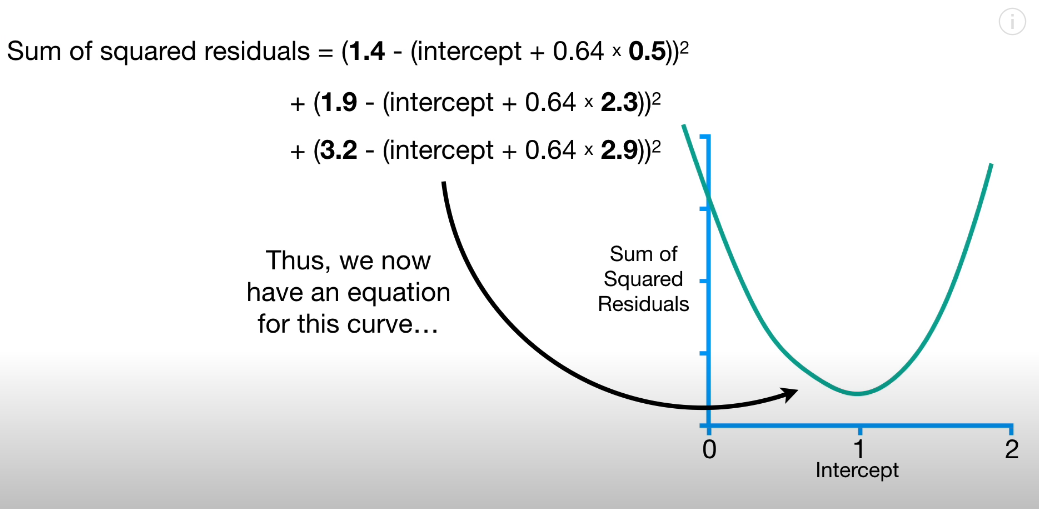
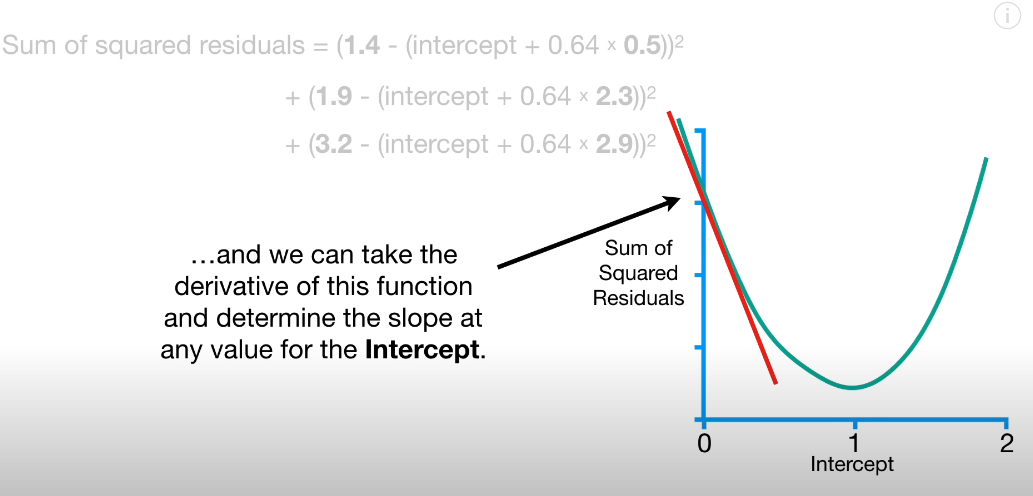
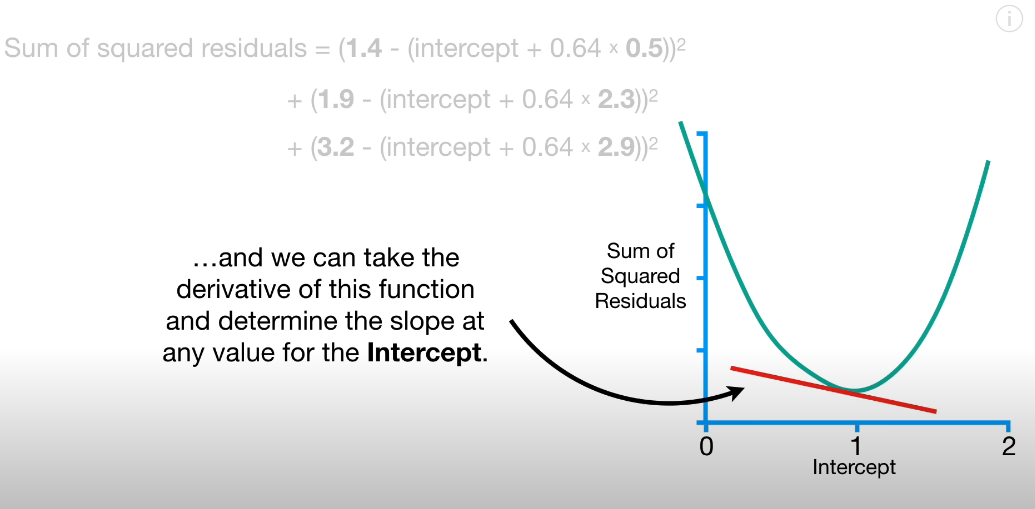
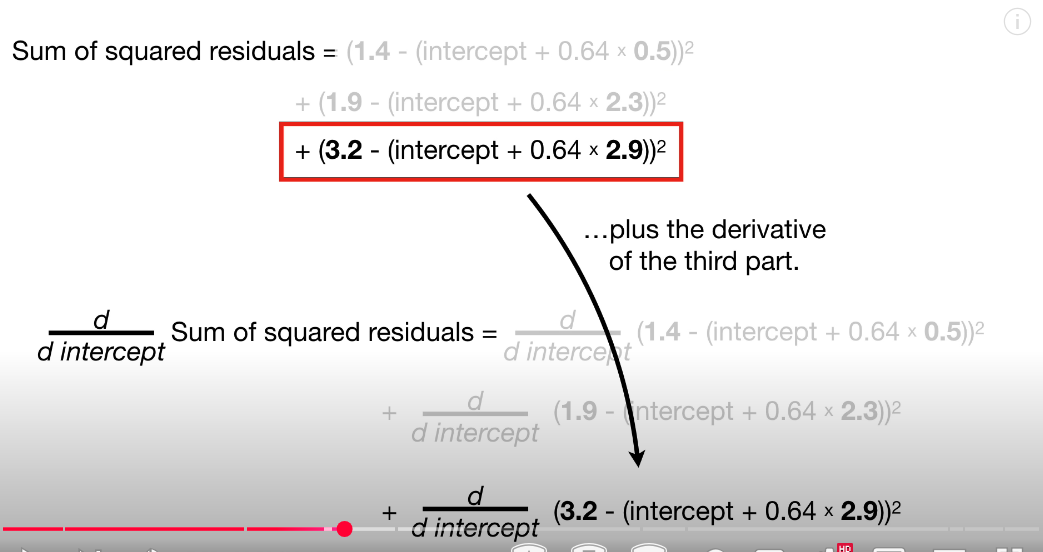
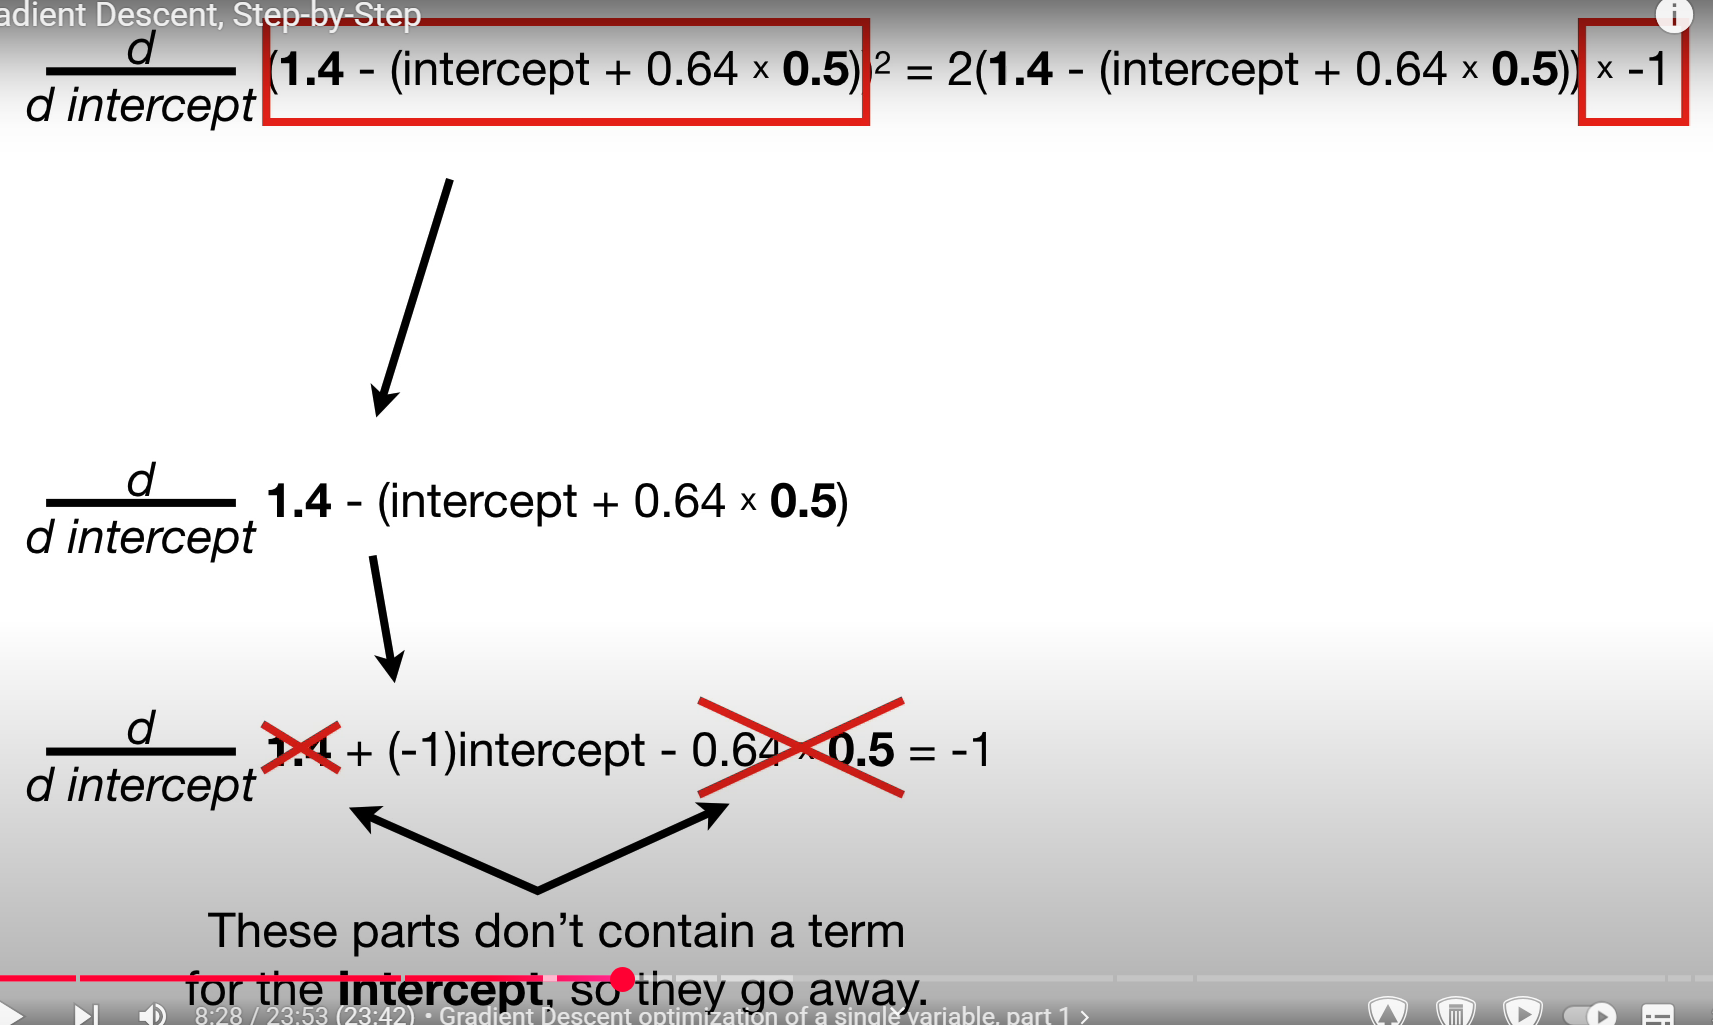
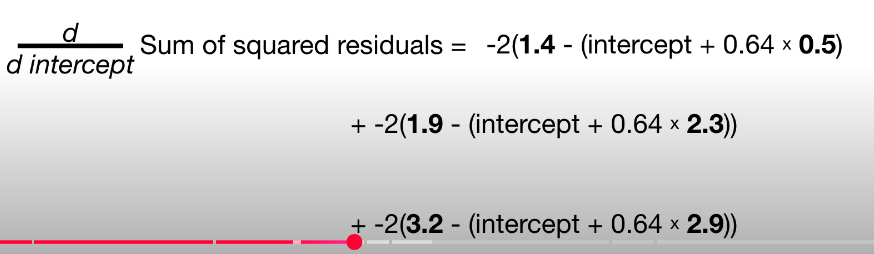
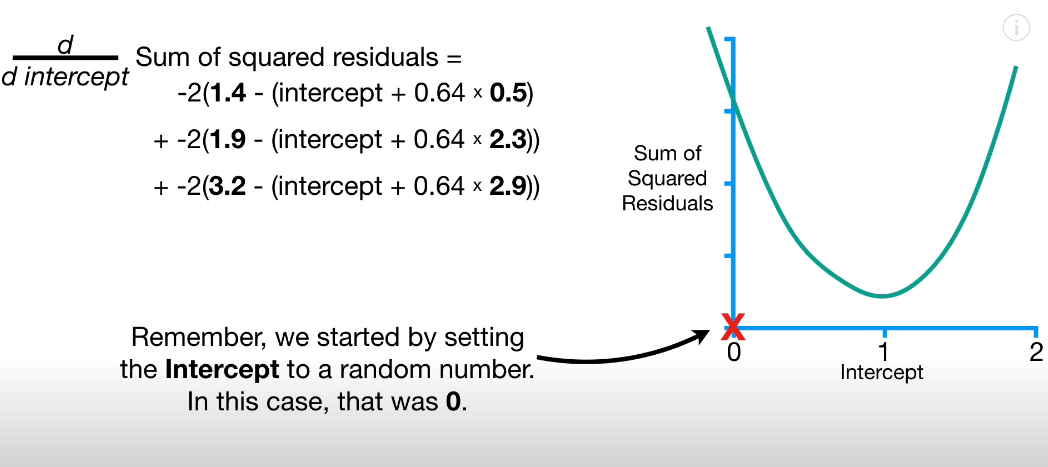
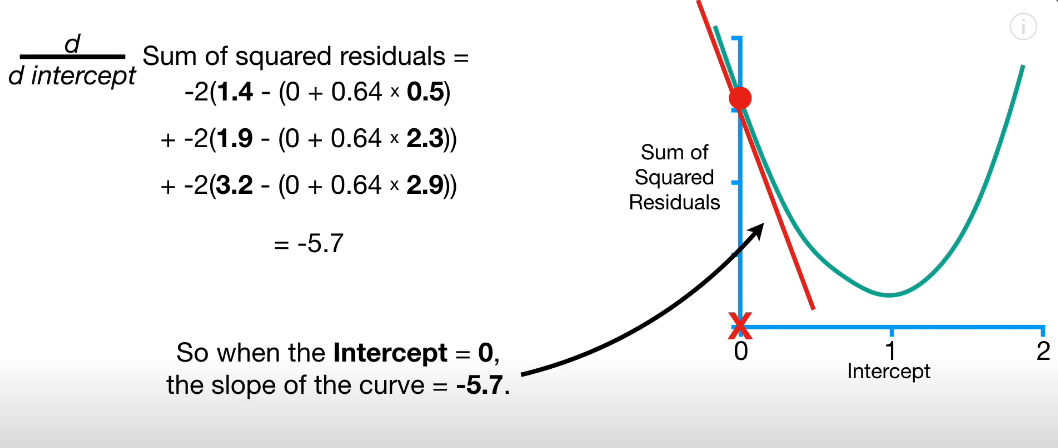
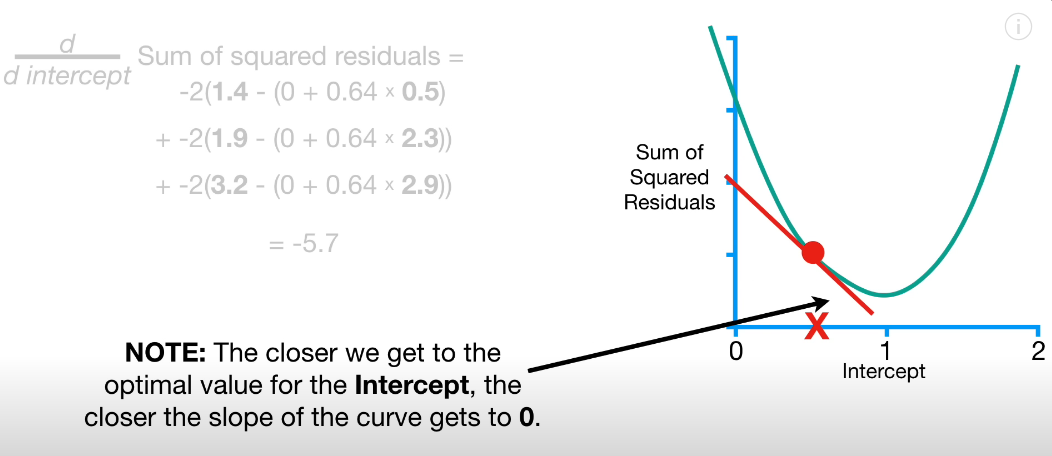
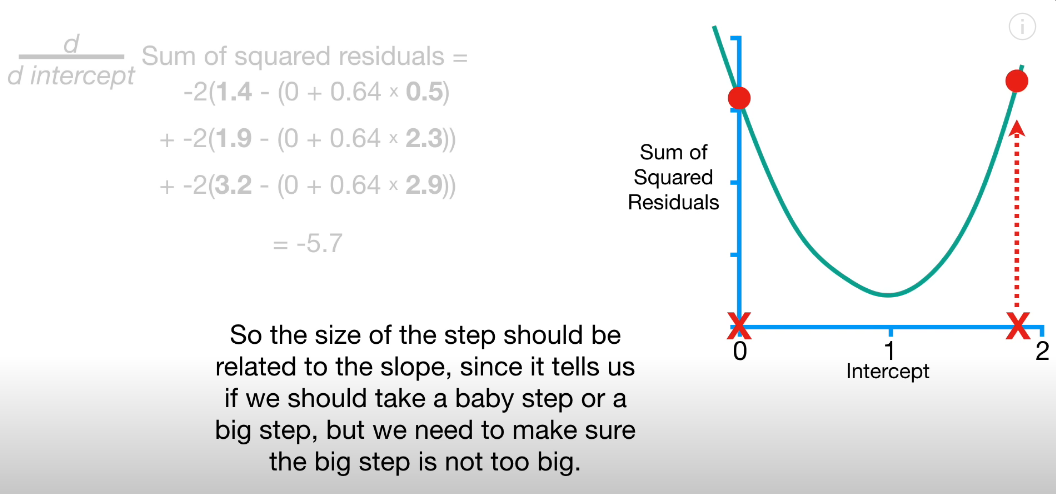

Steps:
1. Start with a random point and calculate the slope of the loss function.
2. Update the point to get close to point with minimal value of loss function:\n
   ```
   step_size = learning_rate * slope
   new_point = old_point - step_size
   ```
   > step_size will tell us to take big steps if we are far from the optimal point and small steps if we are close to the minimal point
3. Repeat the steps if there is not a big difference between the new_point and the old_point

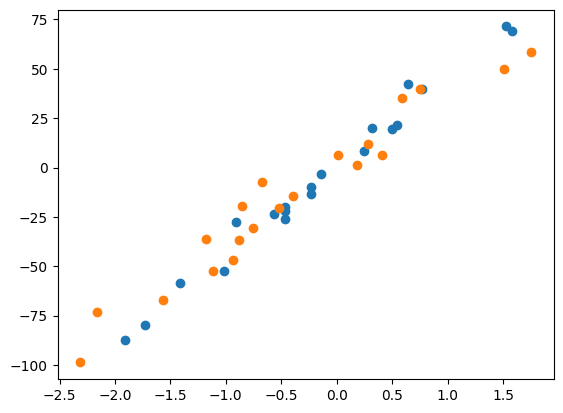

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
np.random.seed(42)


X,y = make_regression(n_samples=20, n_features=1, n_informative=1, 
                      noise=5, random_state=42)
# n_informative: the number of features used to build the linear model used to generate the output.

# create test data with random gaussian noise
std_dev_effect = 0.2
y_noise = np.random.normal(y.mean(), y.std() * std_dev_effect, y.shape)
X_noise = np.random.normal(X.mean(), X.std() * std_dev_effect, X.shape)
y_test = y + y_noise
X_test = X + X_noise

plt.scatter(X,y)
plt.scatter(X_test, y_test)

weights:[45.63336168] & bias:1.196428593082108
Custom R2 score:0.909
scikit_r2:0.909


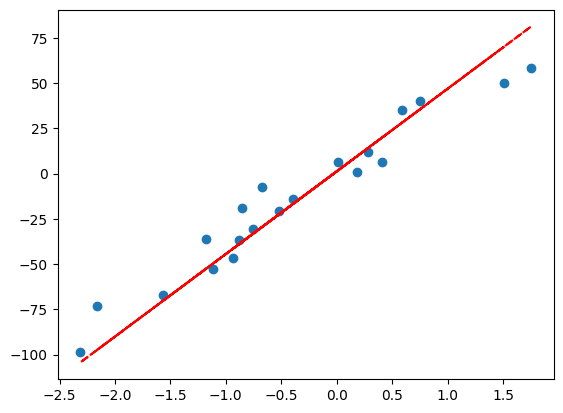

In [16]:
# use scikit-learn linear regression model to compare our custom class
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X, y)
weights = reg.coef_
bias = reg.intercept_
print(f"weights:{weights} & bias:{bias}")
y_preds = reg.predict(X_test)

# R2 score
def custom_r2(y, y_preds):
    u = ((y-y_preds)**2).sum()
    v = ((y-y.mean())**2).sum()
    r2 = 1 - (u/v)
    return r2
r2 = custom_r2(y_test, y_preds)
print(f"Custom R2 score:{r2:.3f}")
scikit_r2 = r2_score(y_test, y_preds)
print(f"scikit_r2:{scikit_r2:.3f}")

plt.scatter(X_test,y_test)
reg_line = X_test*weights + bias
axes = plt.gca()
plt.plot(X_test,reg_line, 'r--')
plt.show()

In [ ]:
# linear regression model
# y^ = wt * x + b
# loss function: sum( [y - y^]**2 ) => sum of [y - (wt*x + b)] ** 2 
                                  # => sum of [y - wt*x - b] ** 2

# parameters we need to find are wt & b
# slope (derivative of loss fn) will be calculated wrt both wt & b
# d(fn)/d(wt) = 2[y - (wt*x + b)] * [(0) + (-x) + (0)] = -2x[y - (wt*x + b)]
# d(fn)/d(b) = 2[y - (wt*x + b)] * [0 - 0 - 1] = -2[y - (wt*x + b)]

class Linear_Regression_SGD():
    def __init__(self, n_iterations=1000, learning_rate=0.01):
        # set weights and bias to 0
        self.wt = np.zeros(X.shape[-1])
        self.bias = 0
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        pass
    
    def gradient_descent(self, X, y, wt, bias):
        # derivative/slope of weights
        d_wt = (-2) * (X) * (y - (wt*X) - bias)
        # derivative/slope of bias
        d_bias = (-2) * (y - (wt*X) - bias)
        # size of the step to take towards the minima of the loss fn;
        # if the slope is steep (d_wt is high), we are far from minima
        # thus take large steps.
        # if the slope is gentle (d_wt is low), we are close to minima
        # thus take smaller steps.
        wt_step_size = self.learning_rate * d_wt
        bias_step_size = self.learning_rate * d_bias 
        # update the weights & bias (params of the optimal line)
        wt_new = wt - wt_step_size
        bias_new = bias - bias_step_size
        return wt_new, bias_new
    
    def fit(self, X, y):
        # iterate for n_iterations
        for iter_num in range(self.n_iterations):
            # update the weights & bias
            self.wt, self.bias = self.gradient_descent(X, y, self.wt, self.bias)
            # check rmse loss
            y_pred = self.wt * X + self.bias
            rmse = self.rmse_loss(y, y_pred)
            print(f"--- Epoch: {iter_num} | RMSE: {rmse} ---")
        return self
    
    def predict(self, X):
        y_pred = self.wt * X + self.bias
        return y_pred
    
    def rmse_loss(self, y, y_preds):
        rmse_loss = (((y-y_preds)**2).sum()) ** (1/2)
        return rmse_loss

In [23]:
num_epochs = 1000
losses = []
linearReg_SGD = Linear_Regression_SGD(n_iterations=num_epochs, 
                                      learning_rate=0.01)

model = linearReg_SGD.fit(X, y)
# predict
y_preds = model.predict(X_test)

# calculate rmse loss = sq_root(sum[(y-y_pred)**2])
rmse_loss = (((y_test-y_preds)**2).sum()) ** (1/2)
losses.append(rmse_loss)
# calculate R2 score = 1 - [(sum of squares of residuals) / (total sum of squares)]
r2_score = custom_r2(y_test, y_preds)
print(f"RMSE Loss: {rmse_loss:.3f} \n R2:{r2_score:.2f}")

--- Epoch: 0 | RMSE: 837.5551011854301 ---
--- Epoch: 1 | RMSE: 806.6709098499247 ---
--- Epoch: 2 | RMSE: 777.6635764370454 ---
--- Epoch: 3 | RMSE: 750.366374705041 ---
--- Epoch: 4 | RMSE: 724.6293965847145 ---
--- Epoch: 5 | RMSE: 700.317900318832 ---
--- Epoch: 6 | RMSE: 677.3107985965756 ---
--- Epoch: 7 | RMSE: 655.4992787618193 ---
--- Epoch: 8 | RMSE: 634.785547105487 ---
--- Epoch: 9 | RMSE: 615.0816892119775 ---
--- Epoch: 10 | RMSE: 596.3086383453881 ---
--- Epoch: 11 | RMSE: 578.3952439474016 ---
--- Epoch: 12 | RMSE: 561.2774324791019 ---
--- Epoch: 13 | RMSE: 544.8974530700716 ---
--- Epoch: 14 | RMSE: 529.2032007313709 ---
--- Epoch: 15 | RMSE: 514.1476102331 ---
--- Epoch: 16 | RMSE: 499.68811412974765 ---
--- Epoch: 17 | RMSE: 485.7861588250668 ---
--- Epoch: 18 | RMSE: 472.4067729912749 ---
--- Epoch: 19 | RMSE: 459.5181830848223 ---
--- Epoch: 20 | RMSE: 447.09147112426325 ---
--- Epoch: 21 | RMSE: 435.1002703080138 ---
--- Epoch: 22 | RMSE: 423.52049444569883 ---
-

In [32]:
model.wt.shape, model.bias.shape, X.shape

((20, 20), (20, 20), (20, 1))

In [28]:
y_preds
# y_preds.shape, y_test.shape

array([[  44.3260355 ,   20.42289841,  -13.87835815,  -83.56624264,
         -28.81392983,  -61.18905444,  -27.47604577,  -54.98568004,
         -10.54104571,    8.7601047 ,  -20.89391983,   72.26533936,
          41.6049286 ,  -24.81108656,   74.78869208,  -91.38834999,
          22.58019283,   -3.47309894,  -23.08544663,   20.72189005],
       [  38.73448781,   17.84663349,  -12.12766015,  -73.02470366,
         -25.17917068,  -53.47030603,  -24.01005522,  -48.04946189,
          -9.211336  ,    7.6550534 ,  -18.25823749,   63.14936301,
          36.35663739,  -21.68126969,   65.35440512,  -79.86008423,
          19.73179406,   -3.03498175,  -20.17331216,   18.10790856],
       [  43.82757012,   20.19323411,  -13.72229003,  -82.62650421,
         -28.48990476,  -60.50095715,  -27.16706579,  -54.36734237,
         -10.4225071 ,    8.66159354,  -20.6589587 ,   71.45268446,
          41.13706324,  -24.53207519,   73.94766099,  -90.36064859,
          22.32626883,   -3.43404245,  -22.825

ValueError: x and y must be the same size

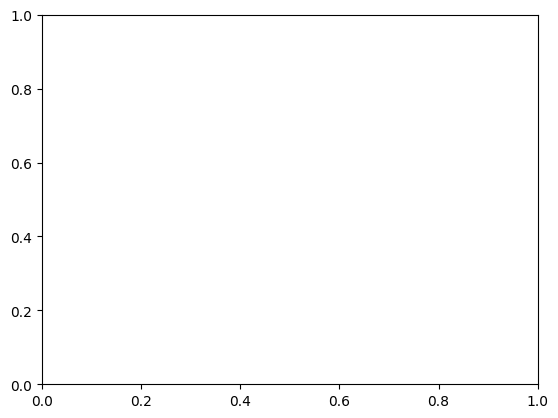

In [26]:
plt.scatter(y_test, y_preds)
plt.show()